# Prediction of Salary of an Employee in a Dataset using Classification by Machine Learning

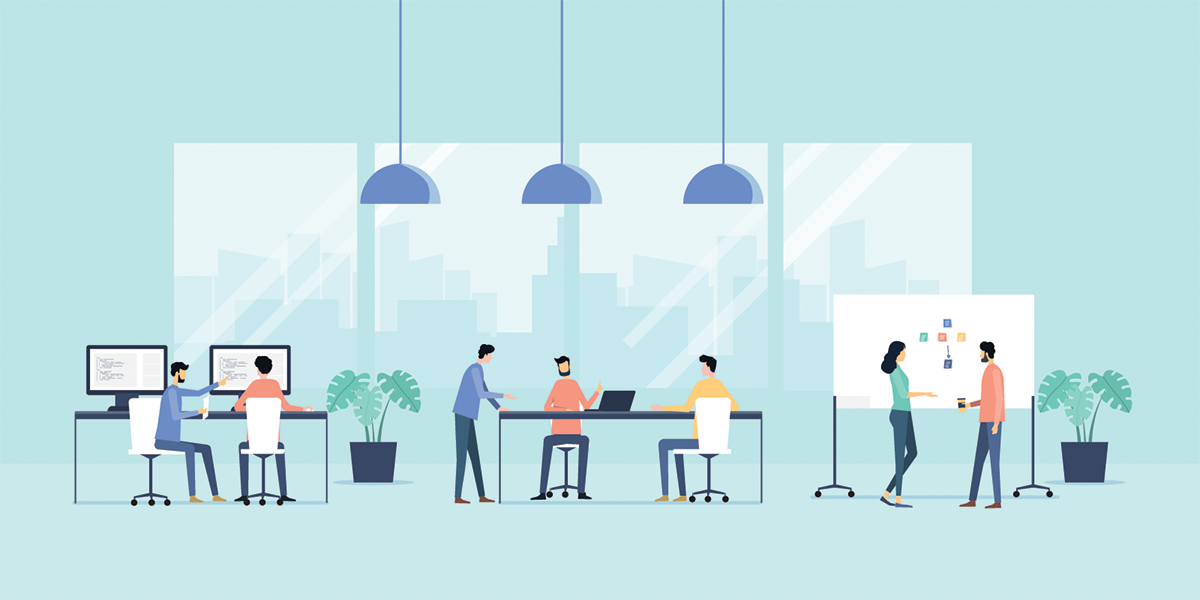

In [106]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
import warnings
warnings.filterwarnings('ignore')

In [107]:
df = pd.read_csv("Salary-data.csv")

In [108]:
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


There are 32560 rows and 15 columns in a dataset.
i have observed the column names is missing in dataset. Now lets give appropriate names to the all columns. So that il will be better for us to work with Algorithms.

In [109]:
col=["Age","Sector","ID","Education","Education.num","Marital Status","Occupation","Living With","Race","Gender","other","other1","other2","Country","Salary"]

In [110]:
df=pd.read_csv("Salary-data.csv",names=col)
df.head()

,Age,Sector,ID,Education,Education.num,Marital Status,Occupation,Living With,Race,Gender,other,other1,other2,Country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [111]:
df.head()

,Age,Sector,ID,Education,Education.num,Marital Status,Occupation,Living With,Race,Gender,other,other1,other2,Country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [112]:
df.shape

(32561, 15)

In [113]:
df.columns

Index(['Age', 'Sector', 'ID', 'Education', 'Education.num', 'Marital Status',
       'Occupation', 'Living With', 'Race', 'Gender', 'other', 'other1',
       'other2', 'Country', 'Salary'],
      dtype='object')

In [114]:
df.describe()

,Age,ID,Education.num,other,other1,other2
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Sector          32561 non-null  object
 2   ID              32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education.num   32561 non-null  int64 
 5   Marital Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Living With     32561 non-null  object
 8   Race            32561 non-null  object
 9   Gender          32561 non-null  object
 10  other           32561 non-null  int64 
 11  other1          32561 non-null  int64 
 12  other2          32561 non-null  int64 
 13  Country         32561 non-null  object
 14  Salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [116]:
df.isnull().sum()

Age               0
Sector            0
ID                0
Education         0
Education.num     0
Marital Status    0
Occupation        0
Living With       0
Race              0
Gender            0
other             0
other1            0
other2            0
Country           0
Salary            0
dtype: int64

There are No Null Values in our DataSet.

In [117]:
income = set(df['Salary'])
print(income)

{' <=50K', ' >50K'}


In [118]:
df['Salary']

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: Salary, Length: 32561, dtype: object

In [119]:
df['Salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: Salary, dtype: int64

In [120]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['Salary'] = label_encoder.fit_transform(df['Salary'])

df['Salary'].unique()

array([0, 1])

In [121]:
df['Salary'].value_counts()

0    24720
1     7841
Name: Salary, dtype: int64

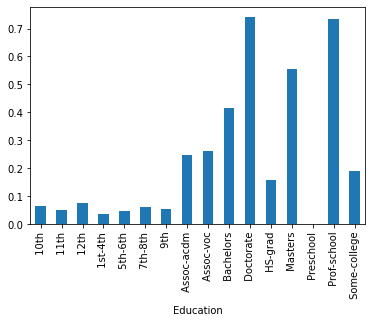

In [122]:
df.groupby('Education').Salary.mean().plot(kind='bar')

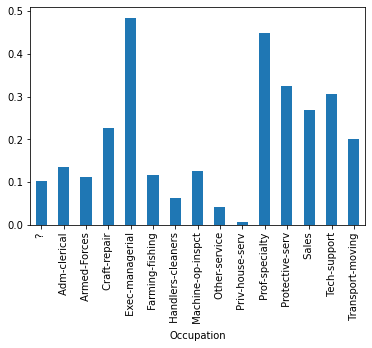

In [123]:
df.groupby('Occupation').Salary.mean().plot(kind='bar')

Just as expected, the higher the education and the higher the job title, the higher is the income. Let's see if that is enough to accomplish our goal.

There is no need to remove Outliers in Salary because there is only two attributes.

In [124]:
df['Occupation']

0              Adm-clerical
1           Exec-managerial
2         Handlers-cleaners
3         Handlers-cleaners
4            Prof-specialty
                ...        
32556          Tech-support
32557     Machine-op-inspct
32558          Adm-clerical
32559          Adm-clerical
32560       Exec-managerial
Name: Occupation, Length: 32561, dtype: object

In [125]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [128]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['Occupation'] = label_encoder.fit_transform(df['Occupation'])

df['Occupation'].unique()

array([ 1,  4,  6, 10,  8, 12,  3, 14,  5,  7, 13,  0, 11,  2,  9])

In [148]:
df['Occupation'].value_counts()

10    4140
3     4099
4     4066
1     3770
12    3650
8     3295
7     2002
0     1843
14    1597
6     1370
5      994
13     928
11     649
9      149
2        9
Name: Occupation, dtype: int64

# let's split our data into training and test set.

In [134]:
from sklearn.model_selection import train_test_split

X = df[['Education.num', 'Occupation']]

Y = df['Salary']

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [135]:
from sklearn.svm import SVC

# Declaring the SVC with no tunning
classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, Y_train)

# Predicting the result and giving the accuracy
score = classifier.score(x_test, y_test)

print(score)

0.7839705204974666


78.7% Not bad for our first shot. We will have to tune that a little more to get the missing 1.3%

In [139]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver="lbfgs")

lr.fit(X_train,Y_train)

X_train, x_test, Y_train, y_test = train_test_split(X,Y,random_state=42,test_size=0.2)

print("Test Accuracy: {}%".format(round(lr.score(x_test,y_test)*100,2)))

Test Accuracy: 78.09%


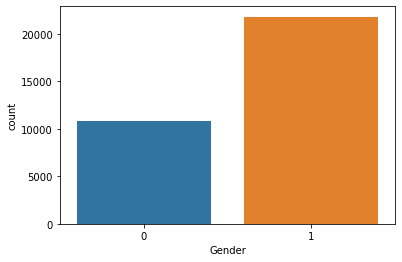

In [151]:
sns.countplot(df['Gender'])
plt.show()

The number of Male employees is almost double the number of Female employee.

In [145]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])

df['Gender'].unique()

array([1, 0], dtype=int64)

In [149]:
df['Gender'].value_counts()

1    21790
0    10771
Name: Gender, dtype: int64

In [146]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['Race'] = label_encoder.fit_transform(df['Race'])

df['Race'].unique()

array([4, 2, 1, 0, 3])

In [147]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['Marital Status'] = label_encoder.fit_transform(df['Marital Status'])

df['Marital Status'].unique()

array([4, 2, 0, 3, 5, 1, 6])

In [152]:
df.head(2)

,Age,Sector,ID,Education,Education.num,Marital Status,Occupation,Living With,Race,Gender,other,other2,Country,Salary
0,39,State-gov,77516,Bachelors,13,4,1,Not-in-family,4,1,2174,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,2,4,Husband,4,1,0,13,United-States,0


Now that we have some more data, let's do the correlation map, and see what it tells us

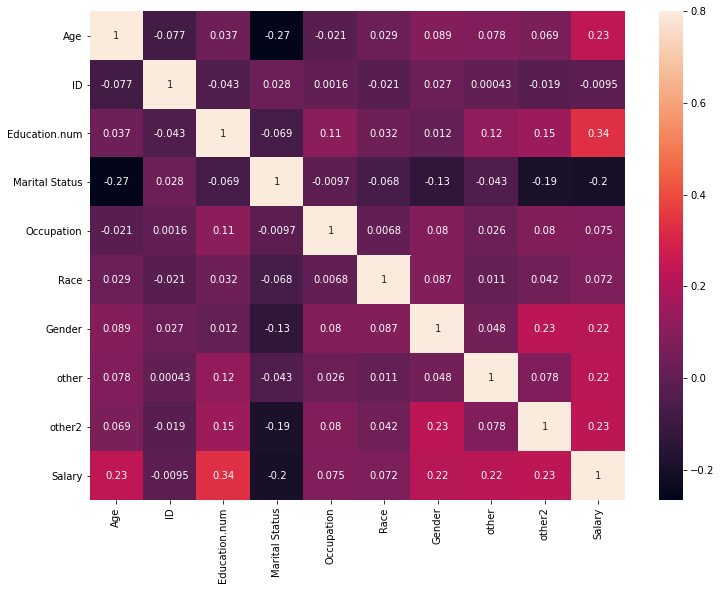

In [154]:
import seaborn as sns
import matplotlib.pyplot as pplt
#correlation matrix
corrmat = df.corr()
f, ax = pplt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, annot = True);

As we can see in Correlation mat, There is very high Correlation between 'Salary' and 'Education'.


And Age of the person is also Correllated with the Salary.

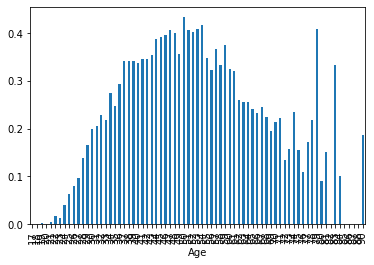

In [155]:
df.groupby('Age').Salary.mean().plot(kind='bar')

Salary sort of follows the normal deviation, with a peak at 50 years old.

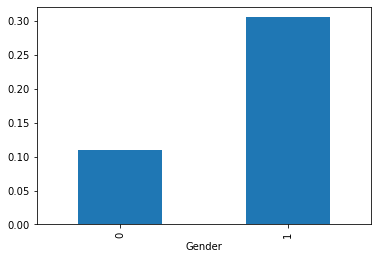

In [156]:
df.groupby('Gender').Salary.mean().plot(kind='bar')

The mean Salary of Women is very less than Men.


And also Men has more chances to have a higher income.

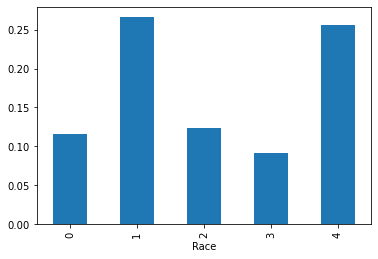

In [158]:
df.groupby('Race').Salary.mean().plot(kind='bar')

White and Asian Pacific Islanders have more placements and chances than other races

# Now we will Hypertune our Data.

In [167]:
# Necessary imports 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV 
  
# Creating the hyperparameter grid 
c_space = np.logspace(-5, 8, 15) 
param_grid = {'C': c_space} 
  
# Instantiating logistic regression classifier 
logreg = LogisticRegression() 
  
# Instantiating the GridSearchCV object 
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5) 
  
logreg_cv.fit(X, Y) 
  
# Print the tuned parameters and score 
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))  
print("Best score is {}".format(logreg_cv.best_score_)) 

Tuned Logistic Regression Parameters: {'C': 0.05179474679231213}
Best score is 0.7807192692671735


# Hyper Tuning using DecisionTreeClassifier

In [161]:
# Necessary imports 
from scipy.stats import randint 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist = {"max_depth": [3, None], 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9), 
              "criterion": ["gini", "entropy"]} 
  
# Instantiating Decision Tree classifier 
tree = DecisionTreeClassifier() 
  
# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5) 
  
tree_cv.fit(X, Y) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_)) 

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 2}
Best score is 0.7866159242656249


# Serialization

In [165]:
import joblib
joblib.dump(logreg_cv,"SalaryPrediction.pkl")

['SalaryPrediction.pkl']